In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
plt.rcParams['figure.figsize']=14,6

In [2]:
#Generating frequency domain filters
def filter_generate(m,n,type,scale_radius,x=0,y=0):
    filter = np.zeros([m,n])
    radius = scale_radius* filter.shape[0]

    if type=='butterworth':
        order = 4
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2 + x)**2)**0.5
                filter[i][j]=1/(1+(dist/radius)**(2*order))
    if type =='idealpf':
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2+x)**2)**0.5
                if dist < radius:
                    filter[i][j]=1
                    
    if type =='gauss':
        for i in range(filter.shape[0]):
            for j in range(filter.shape[1]):
                dist = ((i - filter.shape[0]/2+y)**2 + (j - filter.shape[1]/2+x)**2)**0.5
                filter[i][j]=np.exp(-dist**2/(2*scale_radius*scale_radius))

    return filter

Text(0.5, 1.0, 'Centered FFT spectrum of image')

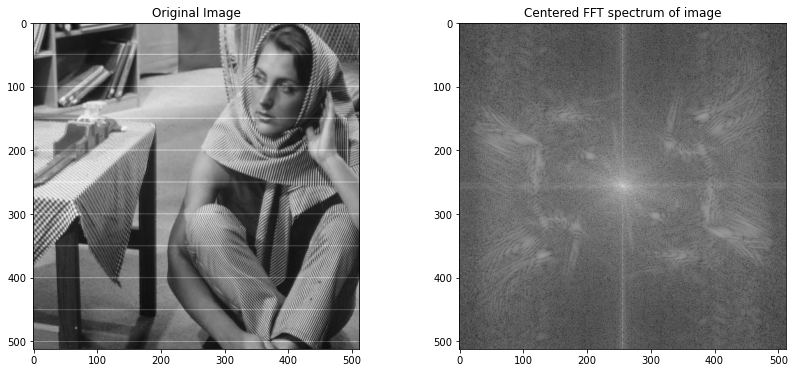

In [3]:
img = cv2.imread('ADITYASAINI_2018125_Q1_Noise-lines.jpg',0)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
centered_fft=np.fft.fftshift(np.fft.fft2(img))
plt.imshow(1+np.log(np.abs(centered_fft)),cmap='gray')
plt.title('Centered FFT spectrum of image')

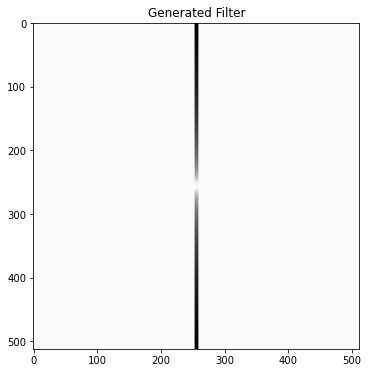

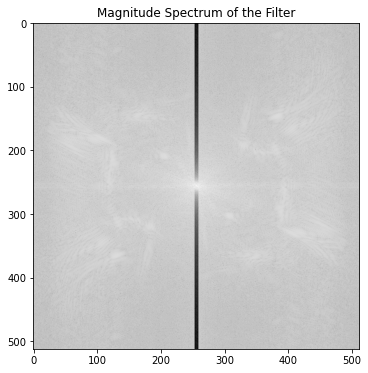

Text(0.5, 1.0, 'Filtered Image(obtained through Fourier filtering)')

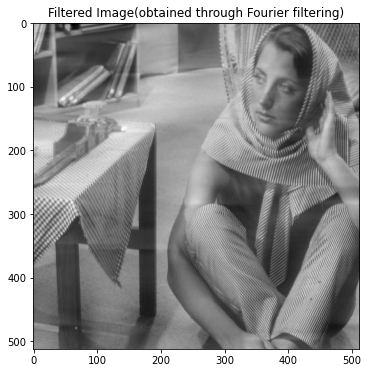

In [4]:
#Initializing the Ideal Low Pass filter
m=img.shape[0]
n=img.shape[1]
filter = np.ones([m,n])
center=n//2
filter[:,center-3:center+3]=0

filter = filter+filter_generate(m,n,'butterworth',0.01)
plt.imshow(1+np.log(np.abs(filter)),cmap='gray')
plt.title('Generated Filter')
plt.show()
#Beginning the Filtering process
filtered_img = centered_fft * filter
plt.imshow(1+np.log(np.abs(filtered_img)),cmap='gray')
plt.title("Magnitude Spectrum of the Filter")
plt.show()
#Obtaining the filtered image
final_img = np.fft.ifft2(np.fft.ifftshift(filtered_img))
plt.imshow(np.real(final_img),cmap='gray')
plt.title("Filtered Image(obtained through Fourier filtering)")

<ipython-input-5-13be4051d764>:5: RuntimeWarning: invalid value encountered in log
  plt.imshow(1+np.log(spatial_filter),cmap='gray')
<ipython-input-5-13be4051d764>:9: RuntimeWarning: invalid value encountered in log
  plt.imshow(1+np.log(np.fft.ifftshift(spatial_filter)),cmap='gray')


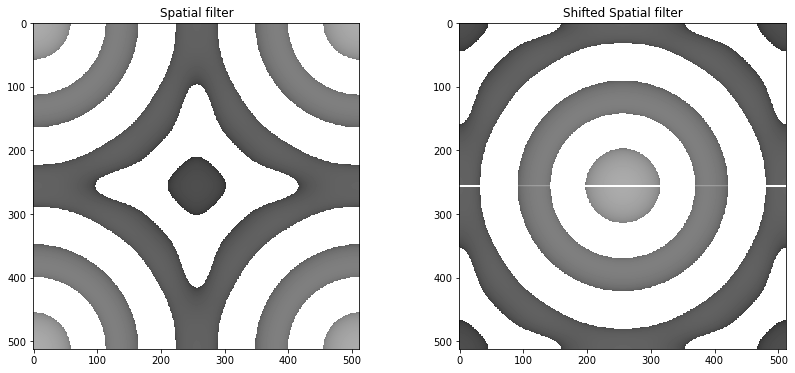

In [5]:
#Generating spatial filter from Inverse FFT
spatial_filter = np.real(np.fft.ifft2(np.fft.ifftshift(filter)))

plt.subplot(1,2,1)
plt.imshow(1+np.log(spatial_filter),cmap='gray')
plt.title("Spatial filter")

plt.subplot(1,2,2)
plt.imshow(1+np.log(np.fft.ifftshift(spatial_filter)),cmap='gray')
plt.title("Shifted Spatial filter")
plt.show()


Text(0.5, 1.0, 'Image obtained through spatial domain filtering')

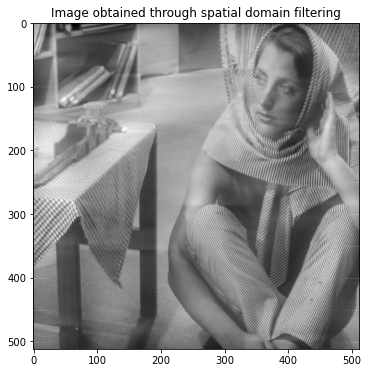

In [6]:
from scipy import signal
final_img_conv=signal.fftconvolve(img,np.fft.ifftshift(spatial_filter),mode='same')
plt.imshow(np.real(final_img_conv),cmap='gray')
plt.title('Image obtained through spatial domain filtering')

Text(0.5, 1.0, 'Image obtained through spatial domain filtering')

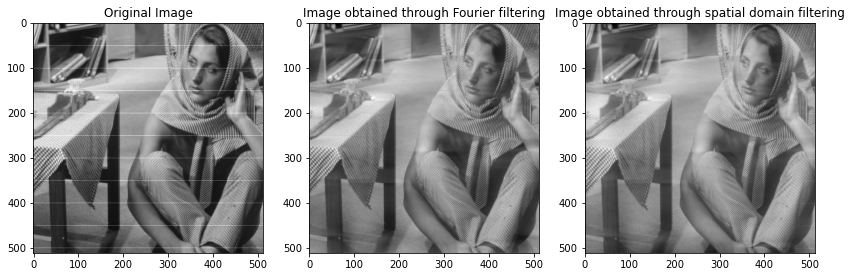

In [7]:
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(np.real(final_img),cmap='gray')
plt.title("Image obtained through Fourier filtering")

plt.subplot(1,3,3)
plt.imshow(np.real(final_img_conv),cmap='gray')
plt.title("Image obtained through spatial domain filtering")

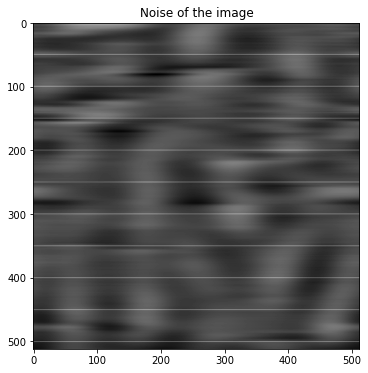

In [8]:
plt.imshow(np.real(img-final_img),cmap='gray')
plt.title('Noise of the image')
plt.show()